# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set()

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


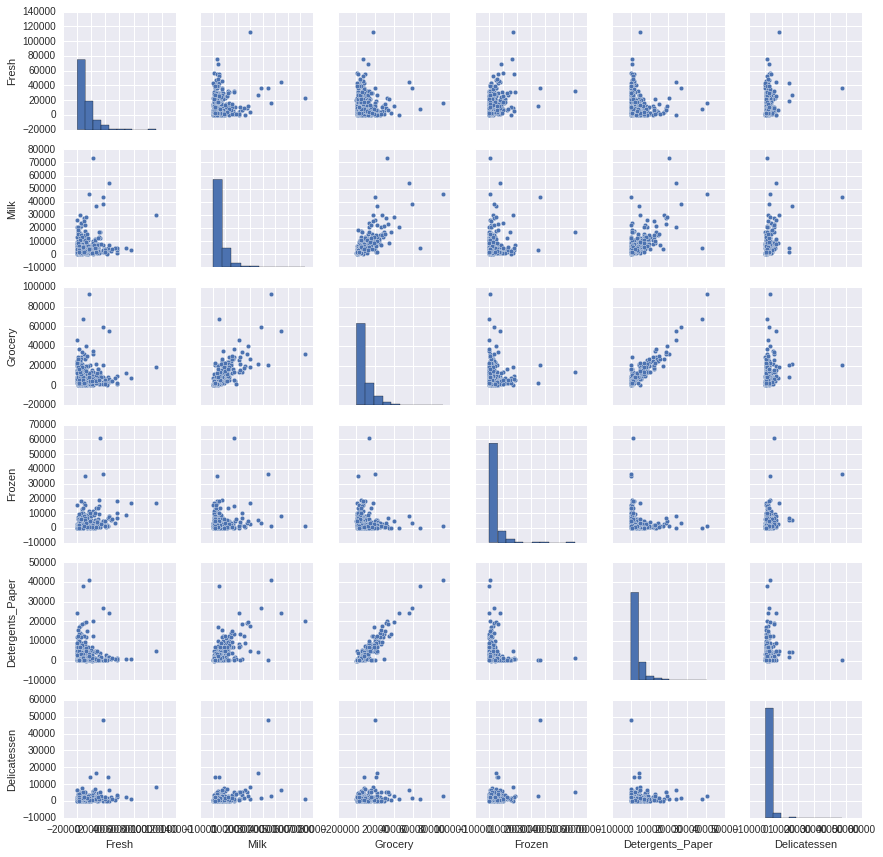

In [2]:
#visualize
sns.pairplot(data,size=2)

In [3]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
#Correlation Table
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


#### Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

<b>Answer:</b><br>
PCA is used for two cases: one is to look correlation between the features of the data and second to perform feature reduction. It produces low-dimensional representation of a dataset . It finds sequence of linear combinations of variables that have maximal variance and are mutually uncorrelated.

PCA finds vectors on which the projected data has maximum variance. ICA, on the other hand, finds vectors on which the projected data is statistically independent.In a more practical way we can say that PCA helps when you want to find a reduced-rank representation of your data and ICA helps when you want to find a representation of your data as independent sub-elements. In layman terms PCA helps to compress data and ICA helps to separate data.

PCA will create new features that minimizes the information loss .<br />
As per the std(standard deviation) 'Fresh' and 'Grocery' have biggest impact on first Principal component, and can show better differntiate between customer segments.<br />
Looking at correlation table, Grocery with Milk and Detergents Paper are highly correlated to each other, so we could expect the this new composite feature would take in 'features' of all three to make this new one component. 

For ICA: All features are used.It will be 6x6 matrix , as we need to get independent components.ICA is not used for reduction , it selects components so that the distribution carries a maximum amount of independent information.<br />
We are using all 6 features, and each vector most probably shows a unique cluster of independent items.
In ICA the basis you want to find is the one in which each vector is an independent component of your data, you can think of your data as a mix of signals and then the ICA basis will have a vector for each independent signal.



### PCA

In [5]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print "\n"
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]


[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


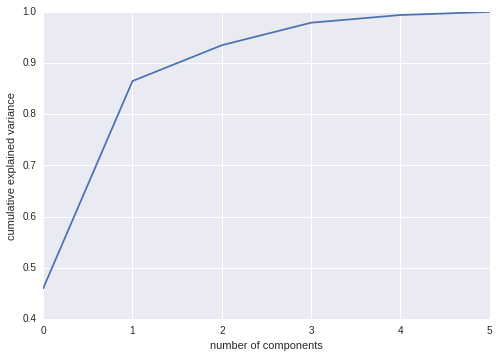

In [6]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

<b>Answer:</b><br>
As per the 'explained_variance_ratio' the variance drops sharply after second component (0.4->0.07) and then there is slow drop off. <br>

The goal is to minimize the information loss and maximize the variance.<br /> 
There can be two methods to choose the pca components : first can be ,choose dimensions which retain>95% of the variance or by the elbow method (as per the graph where variance drops off).

By firt method: as per the ratios the total of first three components retains majority of information - (approx. 93%).
By Second method: as per graph , the first two components retain 86% of the information ,so that is also not bad.

As we also have to reduce the features I think 2 dimension will work.

**3)** What do the dimensions seem to represent? How can you use this information?

<b>Answer:</b><br>
The dimensions represent the eigenvectors , and the directions along the data which has maximum variance .<br>
The eigenvector with the greatest eigenvalue is the first principal component and the second principal component is the eigenvector with the second greatest eigenvalue, and so on.

In this case, the first two components have majority of variance or the components which has most of the information.<br>

The first dimension is mostly by 'Fresh' and the second can be combination of ('Grocery' with 'Milk' with 'Detergents_Paper').

Therefore, instead of representing the data in 'six' dimensions , we would use 'two' dimensions to represent the data and get rid of dimensions which gives us little information. 

This information is important because:
First, it can be used to mitigate problems caused by the curse of dimensionality. 
Second, dimensionality reduction can be used to compress data while minimizing the amount of information that is lost. Third, understanding the structure of data with hundreds of dimensions can be difficult; data with only two or three
dimensions can be visualized easily.

### ICA

[[-0.00433943 -0.05485854  0.01722018  0.00063867 -0.01295257  0.01568351]
 [ 0.01084527  0.00158082 -0.00853785 -0.05412112  0.00298184  0.01675291]
 [ 0.05022872 -0.00736775 -0.00855671 -0.00327605  0.01183644 -0.00228593]
 [ 0.00311645 -0.02115139 -0.1076427   0.00738302  0.13290741  0.01649981]
 [-0.00188926  0.04784045 -0.08921125 -0.00128034  0.02170192 -0.0046971 ]
 [ 0.00497586  0.0022449   0.00674559  0.00252805 -0.00288712 -0.05135639]]


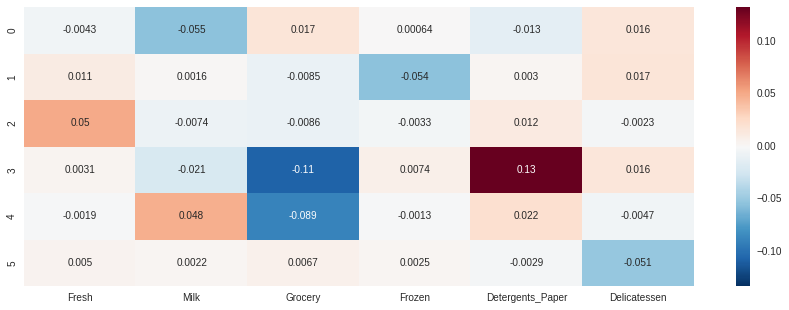

In [7]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA

# Normalize components
normalized_data = data.copy()
normalized_data -= normalized_data.mean(axis=0)
normalized_data /= normalized_data.std(axis=0) 

ica = FastICA().fit(normalized_data)

# Print the independent components
print ica.components_
#visulaize

plt.figure(figsize=(15,5))
sns.heatmap(pd.DataFrame(ica.components_, columns= list(data.columns)),annot=True)

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

<b>Answer:</b><br />
Independent components is derived by minimizing the mutual information and separating the independent components.

Components can be interpreted as: the absolute value of the elements of the unmixing matrix increases, the corresponding feature has a strong effect on that components.<br />

So as per thr heat map , <br />
'Grocery and Detergents_Paper have strong effect on component4, implies that for every 0.13 detergents_paper we have 0.12 Grocery less. <br />
'Milk and Grocery on component5, for every 0.048 of Milk we have 0.089 less Grocery.<br />
For component3 the Fresh has the strongest effect. Similarly for component1 Milk, for component6 delicatessen and for component2 Frozen.

From ICA, the negative/positive implies that which product are anti-correlated/correlated to each other.<br />
We can interpret as:<br />
We can interpret the components as customers/buyers types as to say, so like component1 'Frozen' product is most prevalent.  <br />
If 'Milk' and 'Grocery' had the values 10, -5 respectively, this could imply that for every 10 units of 'Milk' the buyer has, they have 5 unit less of 'Grocery'.<br />
This can be used for segmenting the customers to determine the behavior. The components tells how a set of customer is buying the product.




### Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

#### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

<b>Answer:</b><br />
Advantages of K Means clustering:

- Very simple in terms of implementation and runtime.
- K-Means may produce tighter clusters than hierarchical clustering, especially if the clusters are globular.

Advantages of Gaussian Mixture Models:

- It is the fastest algorithm for learning mixture models. Works on soft clustering.
- Uses bayesian approach, as it works on probability distributions to assign cluster centers by computing how likely the data would come from the means of the clusters.
- Gaussian mixture models are used a lot when the underlying populations can be explained by a normal distribution and there are many heterogeneous populations. 

Which one to choose:

GMM works on the seprating boundries, assign probability to points in middle of decision boundary,when there is some underlying chances that customer could be from other cluster.



**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [8]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [9]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca=PCA(n_components=2)
reduced_data = pca.fit_transform(data)
print reduced_data[:10]  # print upto 10 elements
reduced_data.shape

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


(440, 2)

In [10]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters_gmm=[]
clusters_kmeans=[]

for cl in xrange(2,6):
    clusters_gmm.append(GMM(n_components=cl).fit(reduced_data))
    print "%d Clusters: "%cl ,clusters_gmm[-1],'\n\n'

for cl in xrange(2,6):
    clusters_kmeans.append(KMeans(n_clusters=cl).fit(reduced_data))
    print "%d Clusters: "%cl ,clusters_kmeans[-1],'\n\n'


2 Clusters:  GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0) 


3 Clusters:  GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0) 


4 Clusters:  GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0) 


5 Clusters:  GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=5, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0) 


2 Clusters:  KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0) 


3 Clusters:  KMeans(copy_x=True, init='k-means++', max_ite

In [11]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z_gmm=[]
Z_kmeans=[]
for x in range(4):
    Z_gmm.append(clusters_gmm[x].predict(np.c_[xx.ravel(), yy.ravel()]))
    Z_kmeans.append(clusters_kmeans[x].predict(np.c_[xx.ravel(), yy.ravel()]))

In [12]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
centroids_gmm = []
centroids_kmeans=[]
print "GMM\n"
for x in range(2,6):
    centroids_gmm.append(clusters_gmm[x-2].means_)
    print "%d clusters: "%(x), '\n',centroids_gmm[x-2],'\n\n'

print "\nKMeans \n"
for x in range(2,6):
    centroids_kmeans.append(clusters_kmeans[x-2].cluster_centers_)
    print "%d clusters: "%(x), '\n',centroids_kmeans[x-2],'\n\n'


GMM

2 clusters:  
[[  3308.39301792  -3017.01739698]
 [-10810.23008886   9858.15532401]] 


3 clusters:  
[[   269.05318679  -6506.88683442]
 [-17879.18623839  10122.79246625]
 [  6987.95079141   4249.82914044]] 


4 clusters:  
[[  7174.54719282   5469.02876453]
 [  2339.15204219  -6708.93065712]
 [-15372.37194307  -3334.43379857]
 [ -9486.9742574   34645.20428228]] 


5 clusters:  
[[  7220.96832617   6005.42357897]
 [ -9420.91328272  31861.39346964]
 [  6544.94645781  -6502.58522857]
 [ -4816.58570619  -5806.24630226]
 [-22244.41669326  -3543.27135452]] 



KMeans 

2 clusters:  
[[  4175.31101293   -211.15109304]
 [-24088.33276689   1218.17938291]] 


3 clusters:  
[[  4114.95375632  -3081.03219608]
 [  1339.44615464  25546.49074629]
 [-24220.71188261  -4364.45560022]] 


4 clusters:  
[[  5710.98964991  12661.45687292]
 [  3542.08605212  -4936.7212132 ]
 [-14537.71774395  61715.67085248]
 [-24220.71188261  -4364.45560022]] 


5 clusters:  
[[  5607.91709853  14199.18040025]
 [  6

In [13]:
# Put the result into a color plot
def plot(Z,centroids):
    for i in range(4):
        Z[i] = Z[i].reshape(xx.shape)
        plt.figure(1)
        plt.clf()
        plt.imshow(Z[i], interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

        plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
        plt.scatter(centroids[i][:, 0], centroids[i][:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
        plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())
        plt.show()


GMMs 



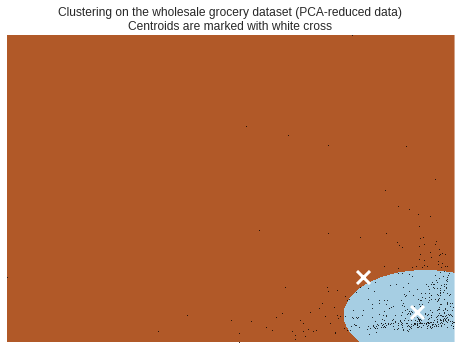

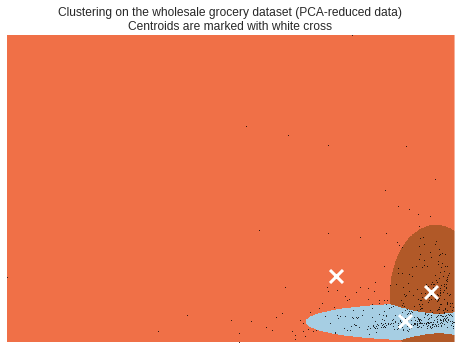

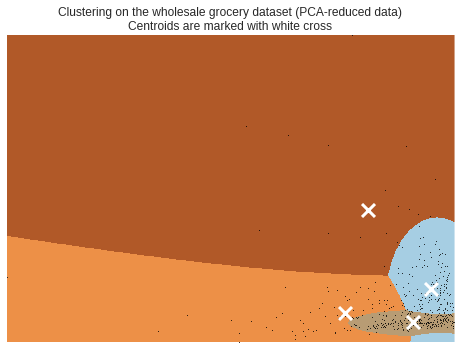

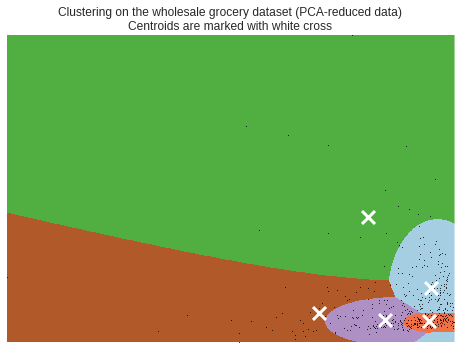

In [14]:
print "GMMs \n"
plot(Z_gmm,centroids_gmm)


 KMeans 



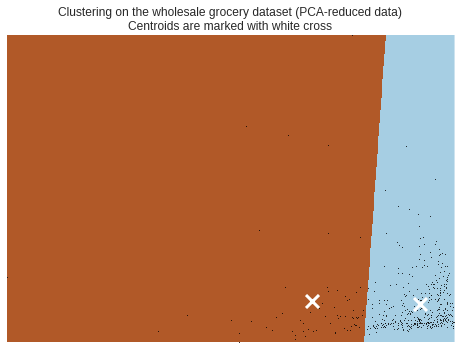

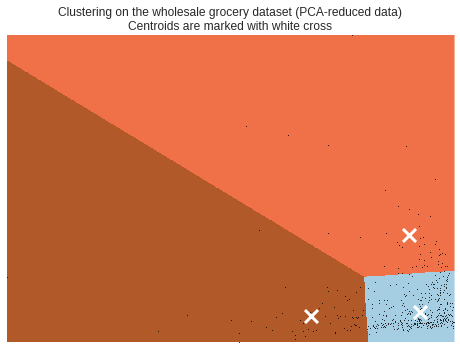

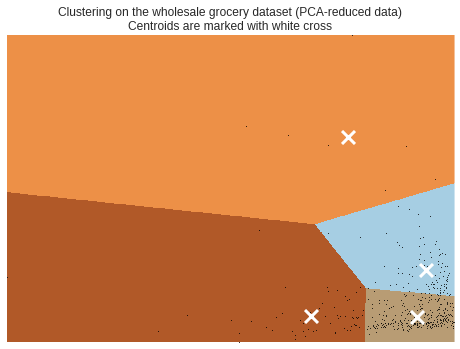

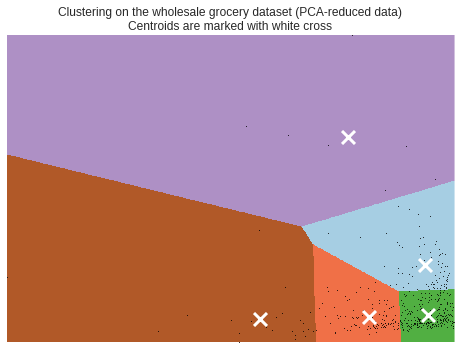

In [15]:
print "\n KMeans \n"
plot(Z_kmeans,centroids_kmeans)

In [16]:
df = pd.DataFrame(pca.inverse_transform(centroids_gmm[0]),columns=data.columns).T
df.columns=  ['Cluster-%i'% x for x in xrange(1,3)]
print df

                    Cluster-1     Cluster-2
Fresh             9103.253975  21466.437141
Milk              3839.157289  12191.151395
Grocery           5440.846701  16154.151586
Frozen            2624.338764   4534.449687
Detergents_Paper  1802.561554   6406.920508
Delicatessen      1127.344327   2823.793792


In [17]:
df = pd.DataFrame(pca.inverse_transform(centroids_gmm[1]),columns=data.columns).T
df.columns=  ['Cluster-%i'% x for x in xrange(1,4)]
print df

                     Cluster-1     Cluster-2     Cluster-3
Fresh             12457.309223  28340.260747   4706.216314
Milk               2407.394673  13184.296687   7141.508630
Grocery            2959.512414  16791.521175  10770.682530
Frozen             3152.769032   5606.553578   1927.643873
Detergents_Paper    506.095063   6453.740247   4483.465716
Delicatessen       1135.138684   3320.328282   1291.534994


In [18]:
df = pd.DataFrame(pca.inverse_transform(centroids_kmeans[-1]),columns=data.columns).T
df.columns=  ['Cluster-%i'% x for x in xrange(1,6)]
print df

                     Cluster-1    Cluster-2     Cluster-3     Cluster-4  \
Fresh              4953.333952  6211.925406  21372.192715  19370.306403   
Milk              12440.643588  2870.190441   4413.007381  39391.081975   
Grocery           18462.947845  4369.565459   4831.710517  56034.130122   
Frozen             1951.625955  2174.905814   4541.230070   4131.435087   
Detergents_Paper   8108.733788  1403.382054   1060.825255  25326.809002   
Delicatessen       1953.422931   851.039752   1866.912735   6037.639444   

                     Cluster-5  
Fresh             49427.357489  
Milk               7534.562994  
Grocery            6075.205180  
Frozen             8919.546126  
Detergents_Paper    610.343759  
Delicatessen       3779.463213  


**7)** What are the central objects in each cluster? Describe them as customers.

<b>Answer:</b><br />
There are two clusters: one of highest volume customer and other smaller family run shop.
The central objects marked with X are the average customers in the cluster.

By trying with different clustering methods, <br />
3 Clusters are the best for this model.

Inverse transform of GMM 3 clusters :<br />
cluster1 : spends lot on Fresh then on Milk,Grocery,Frozen and delication(very less as compared to Fresh) and less on detergents<br />
cluster2 : spends lot on Fresh then approx same on Milk,Grocery,then on Frozen,detergents and delication.<br />
cluster3 : spends lot on Grocery then on Milk then on Fresh and Detergents.




#### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

<b>Answer:</b><br />
The technique that gives insight into the given data was PCA with Gaussian Mixture Models Clustering.

As data has small sets of features , PCA was able to determine the new components with less information loss, although if we had have more features like more than 30 features PCA might be more suitable for that.

For clustering either KMeans or GMM both are suitable. GMM was preferred , as the GMM object implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models, which helps when we don't know the clear cutoff between the clusters.<br />
Segmenting the data into subsets of consumers helps marketers to implement strategies to target them.


**9)** How would you use that technique to help the company design new experiments?

<b>Answer:</b><br />
Now that we have segments created , the company could retest their delivery method, from a regular morning delivery to a cheaper, bulk evening delivery, on the two created segments. It is very likely that there will be no change on high volume customers but there will be some decline in satisfaction rate in small family run shop segment. <br />
So company could come up with new delivery methods to implement on particular segments and can see the change.

So by clustering technique, company can try different techniques and can do experiments on the segments as what can be the best promising technique that would not loose customers or keep customers happy.The business can determine what product sell well together and keep them together to make more profit or keep customers even happier.<br />
With two segments we can use A/B testing, it is a method of comparing the clusters against each other to determine which one performs better. AB testing uses data & statistics to validate new design changes and techniques.By using controlled tests and gathering empirical data, you can figure out exactly which marketing strategies work best for your company and your product.

**10)** How would you use that data to help you predict future customer needs?

<b>Answer:</b><br />
The wholesale distributor can easily use the data and can first categorize the future customer to one of the clusters.<br />As both the clusters will have different techniques (the needs and the demands) the analyst could do analysis on their new delivery methods based on customer's volume.<br />
The company can run segmentation analysis to evaluate the sales, profit, and growth of each group. Say if, high volume customers had higher sales and profit figures along with growth potential, the company could stategically choose to focus their efforts on this segment. <br />
Therefore, they can reduce the amount of complaints about future changes and potentially losing customers.
They can then make use of supervised machine learning techniques to model buying habits of each segment to ensure necessary inventory and delivery.

